## Be Heart Smart

In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
# Import Username,Password and Database_name
#from config import Password,DBname

In [9]:
%matplotlib notebook

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |1= women, 2= men
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: Normal (<200), 2: Moderate (200 - 239), 3: High (>240) |
8. Glucose | Examination Feature | gluc | 1: Normal (<100), 2:Moderate (100 - 125), 3: High (>126) |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [2]:
path = ("../Resources/final_cardio_cleaned.csv")
cardio_df = pd.read_csv(path)
cardio_df.head()

,id,Age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,86650,51,1,171.0,29.0,110.0,70.0,2,1,0,0,1,1
1,26503,49,1,160.0,30.0,120.0,80.0,1,1,0,0,1,1
2,59853,58,1,143.0,30.0,103.0,61.0,2,1,0,0,1,0
3,24167,47,2,170.0,31.0,150.0,90.0,2,2,0,0,1,1
4,31439,42,1,146.0,32.0,100.0,70.0,1,1,0,0,0,0


In [3]:
# list of column names
cardio_df.columns

Index(['id', 'Age', 'gender', 'height', 'weight', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'glucose', 'smoker', 'alcohol_intake',
       'active', 'cardio_disease'],
      dtype='object')

In [4]:
# Check the data type
cardio_df.dtypes

id                  int64
Age                 int64
gender              int64
height            float64
weight            float64
systolic_bp       float64
diastolic_bp      float64
cholesterol         int64
glucose             int64
smoker              int64
alcohol_intake      int64
active              int64
cardio_disease      int64
dtype: object

In [5]:
# Checking for null values
cardio_df.count()

id                68571
Age               68571
gender            68571
height            68571
weight            68571
systolic_bp       68571
diastolic_bp      68571
cholesterol       68571
glucose           68571
smoker            68571
alcohol_intake    68571
active            68571
cardio_disease    68571
dtype: int64

In [6]:
cardio_df.shape

(68571, 13)

## Cleaning up the dataset

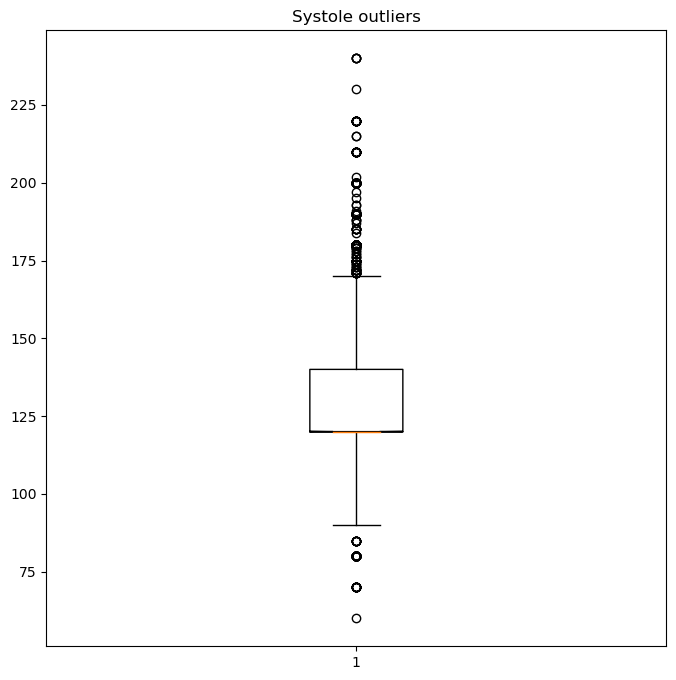

In [7]:
data = [cardio_df["systolic_bp"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Systole outliers')
ax1.boxplot(data, notch= True)
plt.show()

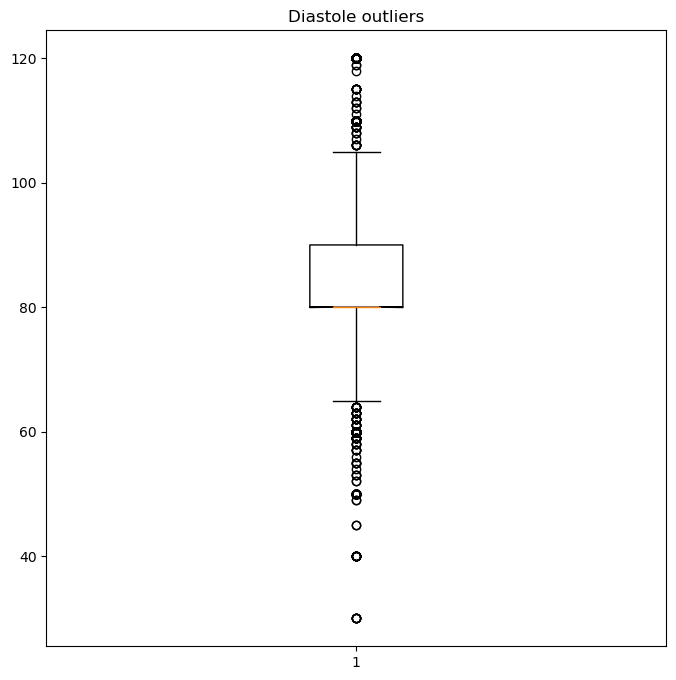

In [8]:
data = [cardio_df["diastolic_bp"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Diastole outliers')
ax1.boxplot(data, notch= True)
plt.show()

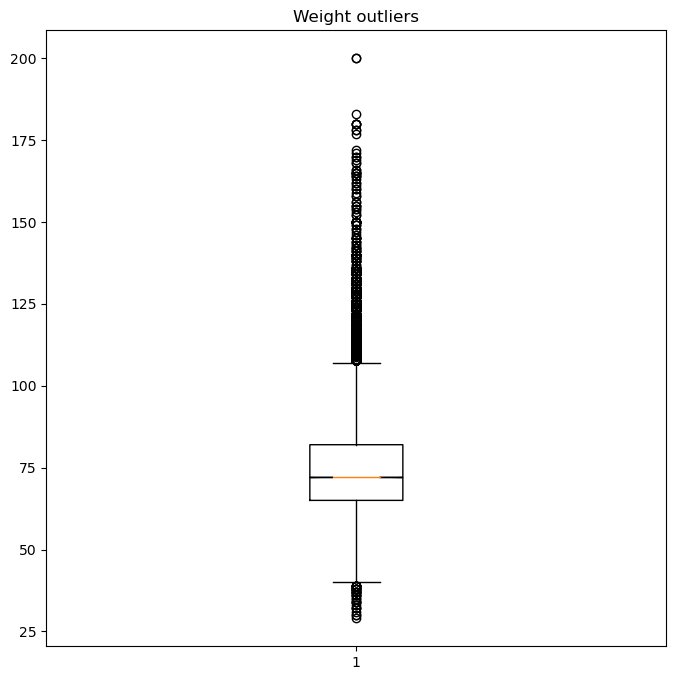

In [9]:
data = [cardio_df["weight"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Weight outliers')
ax1.boxplot(data, notch= True)
plt.show()

<IPython.core.display.Javascript object>


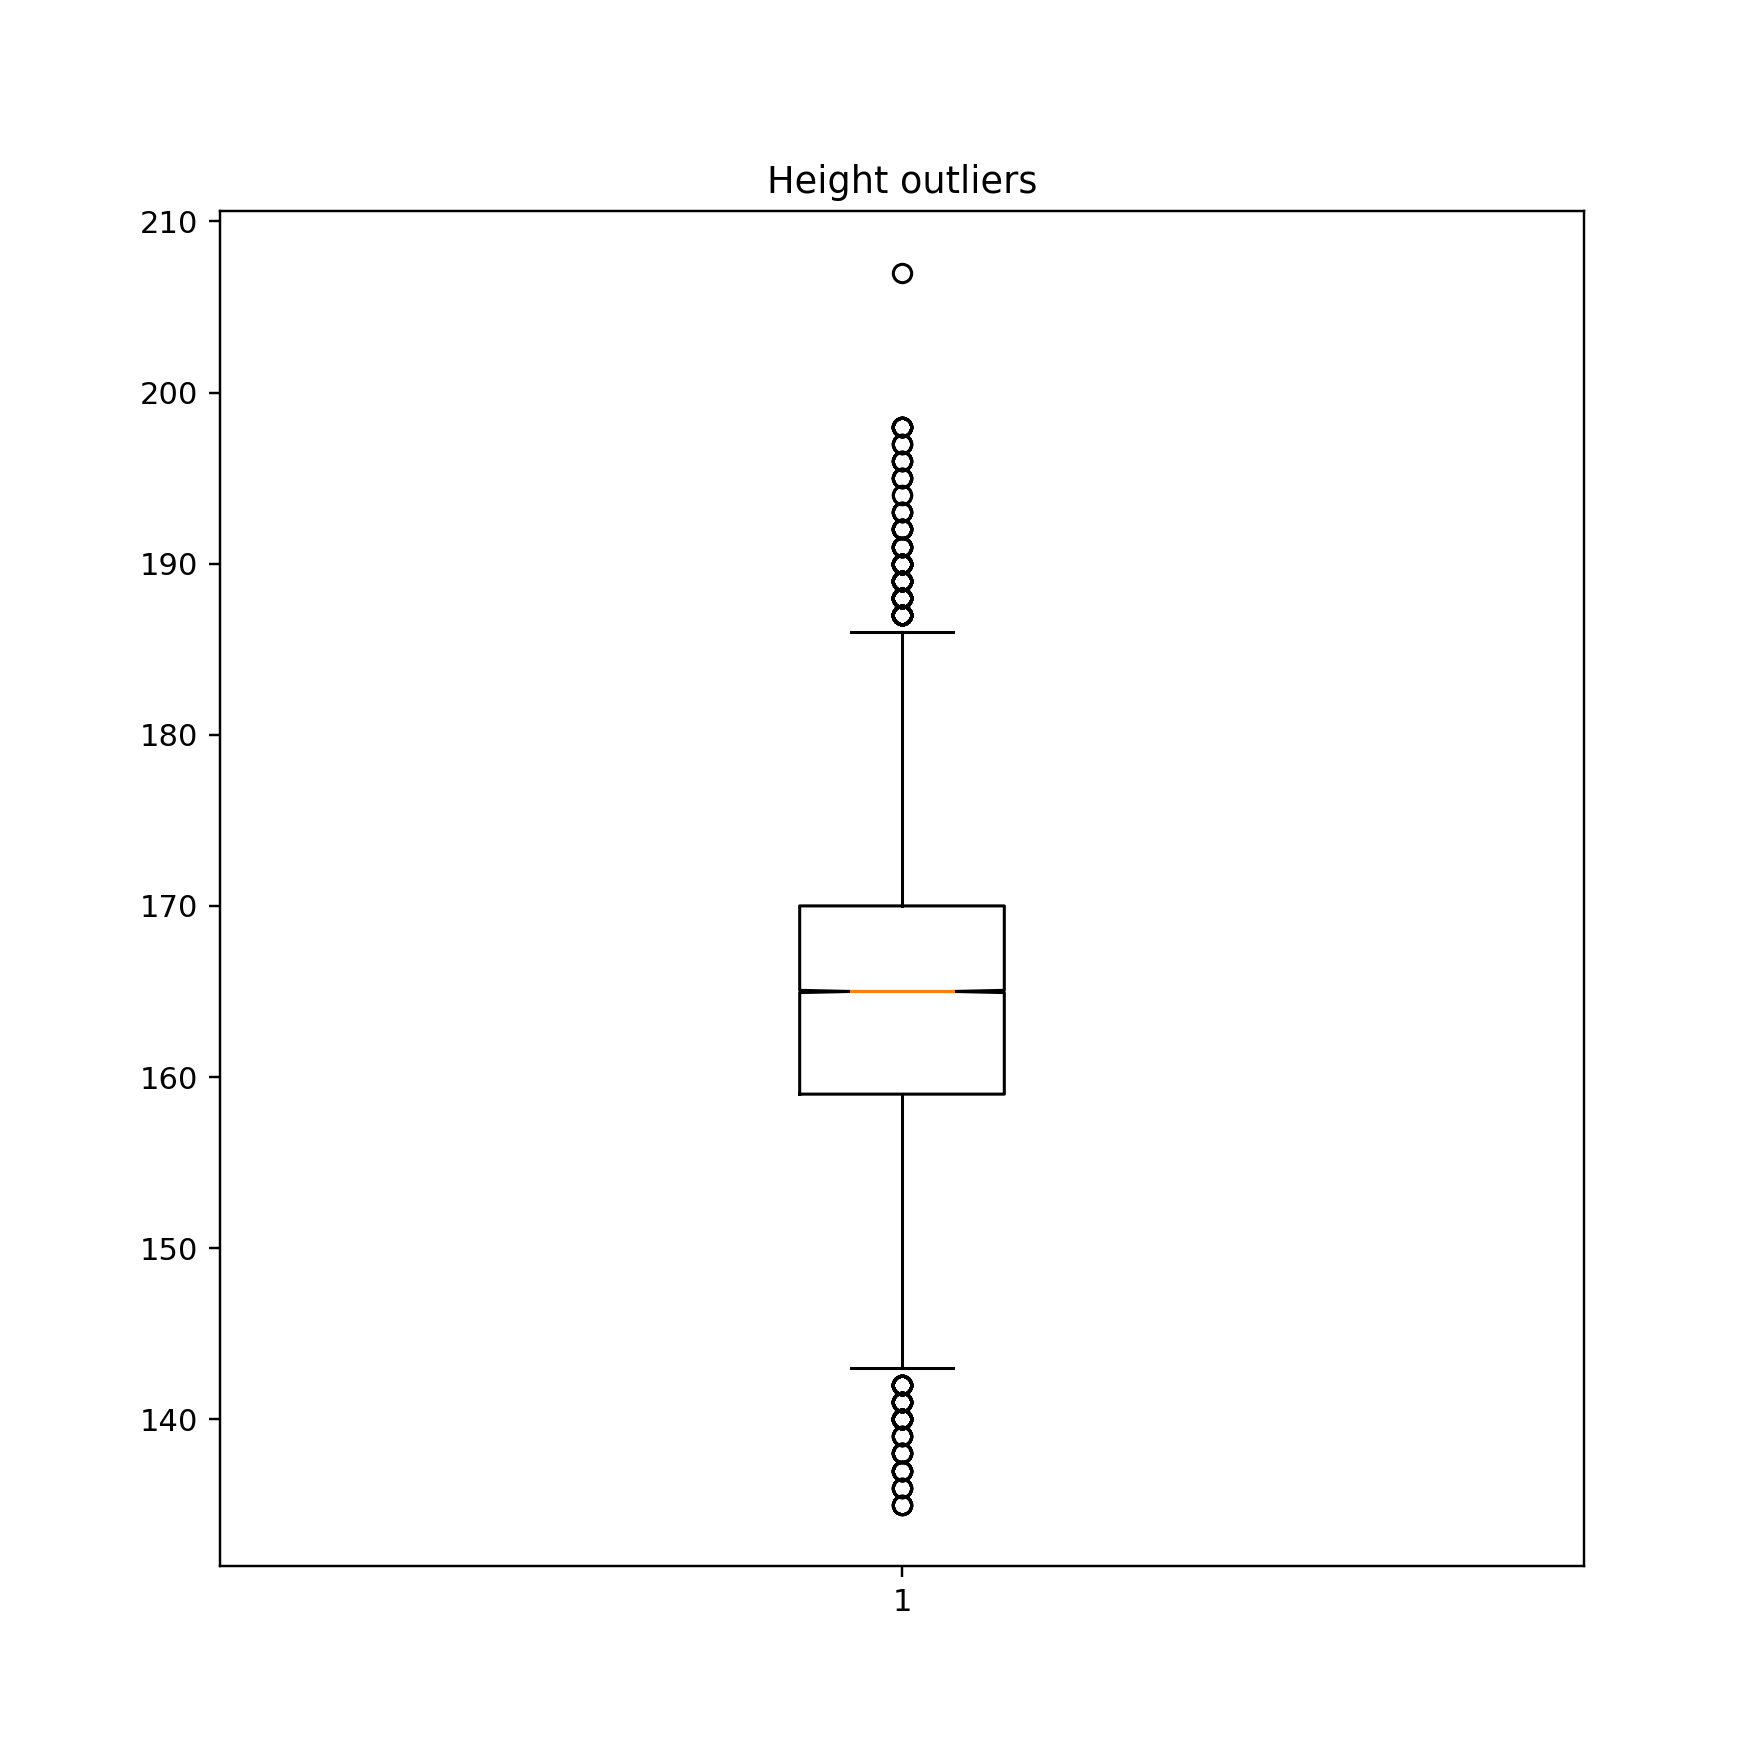

In [83]:
data = [cardio_df["height"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Height outliers')
ax1.boxplot(data, notch= True)
plt.show()

In [11]:
cholesterol_cardio_df = cardio_df["cardio_disease"].groupby(cardio_df["cholesterol"]).mean()
cholesterol_cardio_df.head()

cholesterol
1    0.43518
2    0.59593
3    0.76222
Name: cardio_disease, dtype: float64

<IPython.core.display.Javascript object>


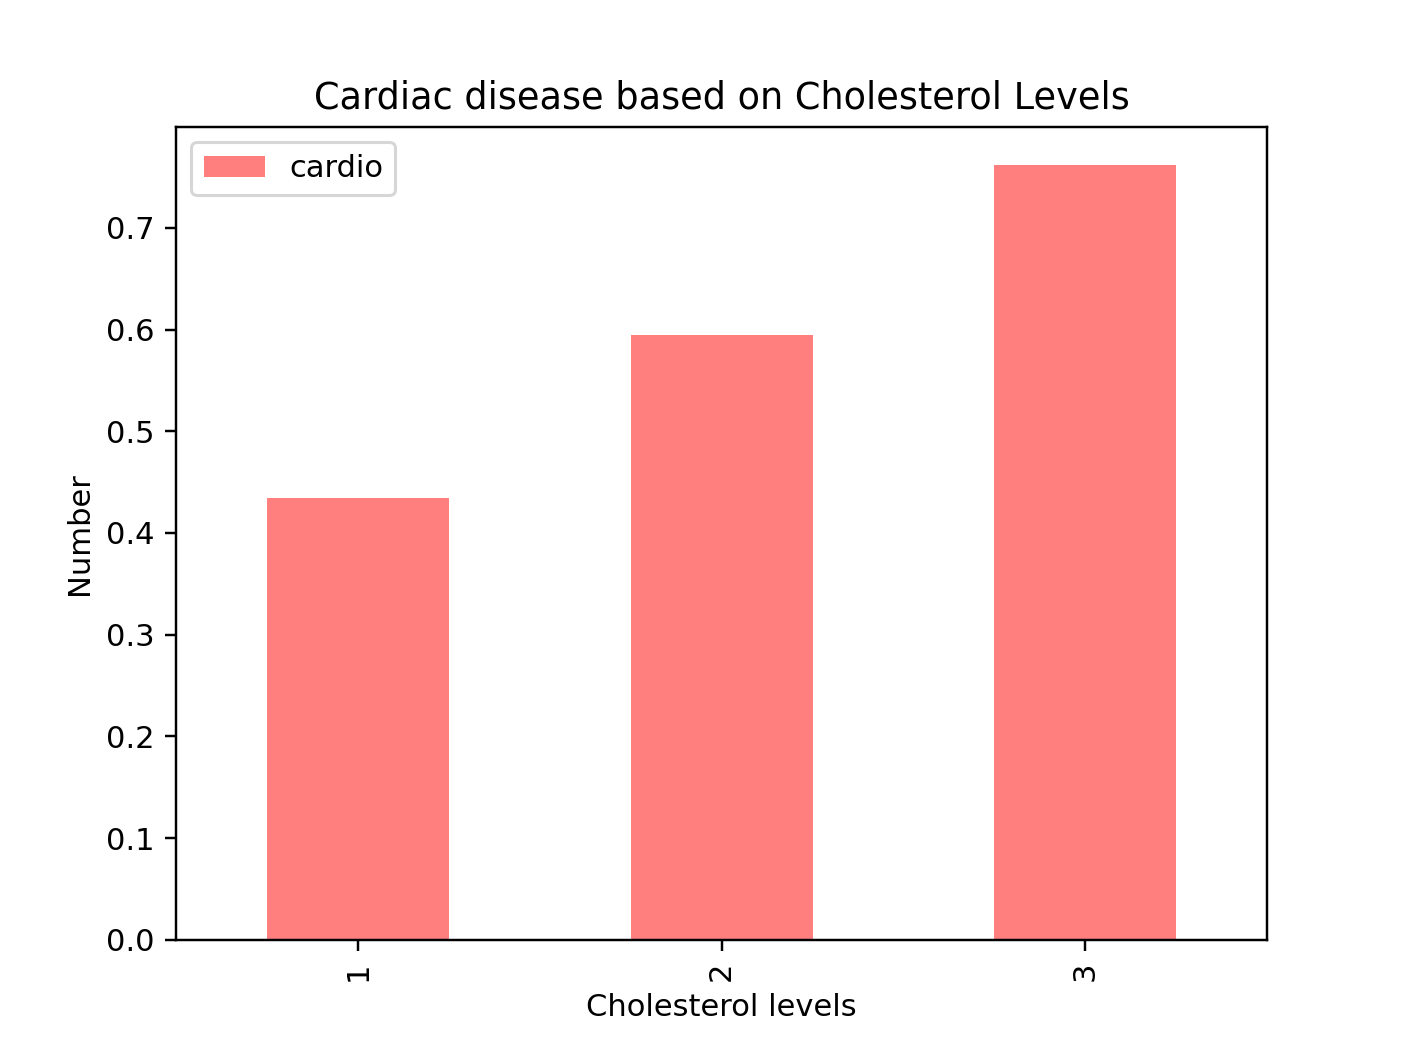

In [85]:
cholesterol_cardio_df.plot.bar(color='r', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Cholesterol levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Cholesterol Levels")
# Add the legend.
plt.legend()


In [86]:
print(f" People with very high Cholesterol level have a greater chance of developing heart disease.")

 People with very high Cholesterol level have a greater chance of developing heart disease.


In [12]:
glucose_cardio_df = cardio_df["cardio_disease"].groupby(cardio_df["glucose"]).mean()
glucose_cardio_df.head()

glucose
1    0.475363
2    0.587490
3    0.617421
Name: cardio_disease, dtype: float64

<IPython.core.display.Javascript object>


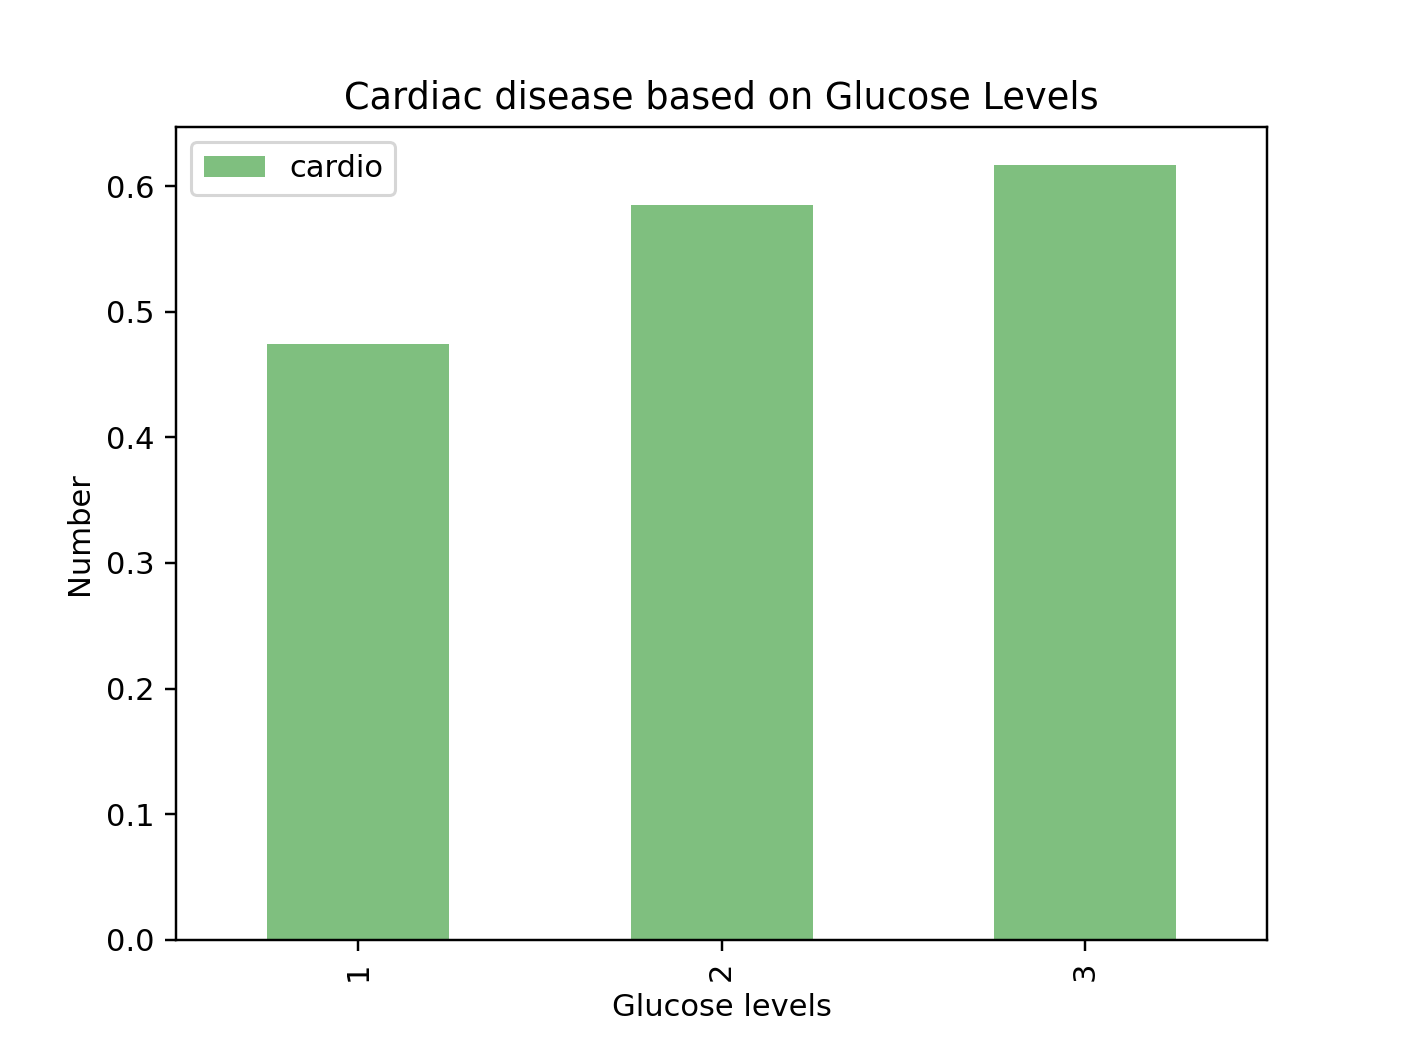

In [88]:
glucose_cardio_df.plot.bar(color='green', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Glucose levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Glucose Levels")
# Add the legend.
plt.legend()

In [89]:
print(f" People with very high Glucose level have a greater chance of developing heart disease.")

 People with very high Glucose level have a greater chance of developing heart disease.


In [25]:
gender_cardio_df = cardio_df["cardio_disease"].groupby(cardio_df["gender"]).mean()
gender_cardio_df.head()

gender
1    0.491918
2    0.499101
Name: cardio_disease, dtype: float64

In [26]:
gender_cardio_df.plot.bar(color='blue', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("gender")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Gender")
# Add the legend.
plt.legend()

In [27]:
alcohol_cardio_df = cardio_df["cardio_disease"].groupby(cardio_df["alcohol_intake"]).mean()
alcohol_cardio_df.head()

alcohol_intake
0    0.495463
1    0.475969
Name: cardio_disease, dtype: float64

In [28]:
alcohol_cardio_df.plot.bar(color='cyan', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Alcohol Consumption")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Alcohol Consumption")
# Add the legend.
plt.legend()

In [24]:
print(f" Alcohol consumption alone doesnot Contribute to developing heart disease.")

 Alcohol consumption alone doesnot Contribute to developing heart disease.
